<h1><center> <span style="color:blue"> DELHIVERY - Feature Engineering </span> </center></h1>

# <span style='background :yellow' > About Delhivery </span>

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# <span style='background :yellow' > Problem Statement</span> 
By manuipulating and analysing the data bring some insights which will help the company in efficiency and increase profit.

- How and where time can be saved?
- Where is the loop-hole in the logistic process?
- How can the process be optimized to bring in more profits and efficiency?

# <span style='background :yellow' > Observation of Data</span> 

In [835]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st
import re

from scipy.stats import ttest_ind, f_oneway, kruskal, ttest_ind # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples 

import warnings
warnings.filterwarnings('ignore')

In [836]:
delhivery = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/6. Delhivery/delhivery_data.csv")

In [837]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [838]:
#shape of the data
delhivery.shape

(144867, 24)

In [839]:
#data type of all columns, counts 
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# <span style='background :yellow' >Handling missing values, dtype, drop unwanted </span>

In [840]:
#deep copy of original data to manipulate the data and keep the original data intact
df = delhivery.copy(deep=True)

In [841]:
#dropped the unkown series from the data, as the business case's brief says that this columns are unknown which means they are of no us in alaysis
df.drop(["is_cutoff", "cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis = 1, inplace = True)

In [842]:
#statistical summary of the numerical data
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [843]:
#statistical summary of the categorical data
df.describe(include = "object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81


In [844]:
#Checking null values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [845]:
#treating the null vlaues with unknown, as the source name cannot be decided randomly.
df["source_name"].replace(np.nan, "unknown", inplace = True)

In [846]:
#treating the null vlaues with unknown, as the destination name cannot be decided randomly.
df["destination_name"].replace(np.nan, "unknown", inplace = True)

In [847]:
#rechecking if the null values are treated properly
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [848]:
#changed the dtype of timestamp data to datetime format 
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [849]:
#checking the columns and dtype of new data, after treating null values and dropping unwanted columnns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [850]:
#columns in the new data, printed it use for the merging the rows on the basis of groupby and aggregation
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [851]:
#new data initial data of  rows
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [852]:
#formated to timestamp
df["od_start_time"] = df["od_start_time"].dt.strftime('%d-%m-%Y %H:%M:%S')
df["od_end_time"] = df["od_end_time"].dt.strftime('%d-%m-%Y %H:%M:%S')
df["trip_creation_time"] = df["trip_creation_time"].dt.strftime('%d-%m-%Y %H:%M:%S')

In [853]:
#changed new columns dtype to datetime format
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

# <span style='background :yellow' >Merging the rows </span>

In [855]:
#merging the rows based on the source and destination
df_agg = df.groupby(['data','trip_creation_time','route_schedule_uuid','route_type','trip_uuid','source_center',
            'source_name','destination_center','destination_name','od_start_time',
            'od_end_time','start_scan_to_end_scan'], as_index=False).agg({
    'actual_distance_to_destination':'last',
    'actual_time':'last','osrm_time':'last','osrm_distance':'last',
    'segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})

In [856]:
df_agg

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,test,2018-01-10 00:01:57,thanos::sroute:8a57e4e4-7695-41a2-9f6f-4d5eec4...,Carting,trip-153835211747541776,IND686507AAA,Parakkdavu_KeRoad_D (Kerala),IND686513AAA,Mundakayam_Central_D_1 (Kerala),2018-01-10 02:10:46,2018-01-10 02:52:21,41.0,9.794329,24.0,9.0,12.8871,24.0,9.0,12.8871
1,test,2018-01-10 00:02:31,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153835215185692720,IND845305AAA,Raxaul_KairiyaT_D (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-01-10 06:16:17,2018-02-10 00:41:58,1105.0,108.516945,563.0,96.0,135.2561,560.0,134.0,189.5416
2,test,2018-01-10 00:02:31,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153835215185692720,IND845401AAA,Motihari_RajaBzr_D (Bihar),IND845305AAA,Raxaul_KairiyaT_D (Bihar),2018-01-10 03:53:47,2018-01-10 06:16:17,142.0,35.140544,98.0,35.0,48.2993,98.0,34.0,48.2993
3,test,2018-01-10 00:03:55,thanos::sroute:b0529f1a-f51e-40dd-8825-4ee14c0...,FTL,trip-153835223580501120,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND848114AAA,DalsinghSarai_Wardno13_D (Bihar),2018-01-10 00:03:55,2018-01-10 02:11:05,127.0,66.711536,102.0,48.0,68.9694,101.0,47.0,68.9694
4,test,2018-01-10 00:03:55,thanos::sroute:b0529f1a-f51e-40dd-8825-4ee14c0...,FTL,trip-153835223580501120,IND848114AAA,DalsinghSarai_Wardno13_D (Bihar),IND848210AAA,Rusera_Wardno4_D (Bihar),2018-01-10 02:11:05,2018-01-10 03:45:49,94.0,19.922478,39.0,22.0,21.6634,39.0,22.0,21.6634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26364,training,2018-12-09 23:58:41,thanos::sroute:e911e081-3350-4a27-b5af-961d893...,Carting,trip-153679672155452701,IND691001AAB,Kollam_Central_H_1 (Kerala),IND691506AAA,Kottarakkara_Amankovl_D (Kerala),2018-12-09 23:58:41,2018-09-13 02:07:04,128.0,20.226251,40.0,27.0,24.6472,39.0,25.0,24.6472
26365,training,2018-12-09 23:58:41,thanos::sroute:e911e081-3350-4a27-b5af-961d893...,Carting,trip-153679672155452701,IND691305AAA,Punalur_PostofJN_D (Kerala),IND689645AAA,Pthnmthitt_Klskhrpt_D (Kerala),2018-09-13 02:51:43,2018-09-13 04:02:49,71.0,21.911626,57.0,24.0,26.1980,56.0,23.0,26.1980
26366,training,2018-12-09 23:58:41,thanos::sroute:e911e081-3350-4a27-b5af-961d893...,Carting,trip-153679672155452701,IND691506AAA,Kottarakkara_Amankovl_D (Kerala),IND691305AAA,Punalur_PostofJN_D (Kerala),2018-09-13 02:07:04,2018-09-13 02:51:43,44.0,16.177896,42.0,20.0,18.8517,41.0,20.0,18.8517
26367,training,2018-12-09 23:58:41,thanos::sroute:e911e081-3350-4a27-b5af-961d893...,Carting,trip-153679672155452701,IND691551AAA,Adoor_Town_D (Kerala),IND691001AAB,Kollam_Central_H_1 (Kerala),2018-09-13 05:20:39,2018-09-13 16:08:42,648.0,32.184676,80.0,40.0,42.2505,78.0,44.0,44.4854


In [857]:
# #merging the rows based on the trip ID
df1 = df_agg.groupby(['data','trip_creation_time','route_schedule_uuid','route_type','trip_uuid'], as_index=False).agg({
    'source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',
    'od_start_time':'first',
    'od_end_time':'last',
    'start_scan_to_end_scan':'sum',
    
    'actual_distance_to_destination':'sum',
    'actual_time':'sum','osrm_time':'sum','osrm_distance':'sum',
    'segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})

In [858]:
#checking and reconfirming if the merging is done as per the requirement
df1.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,test,2018-01-10 00:01:57,thanos::sroute:8a57e4e4-7695-41a2-9f6f-4d5eec4...,Carting,trip-153835211747541776,IND686507AAA,Parakkdavu_KeRoad_D (Kerala),IND686513AAA,Mundakayam_Central_D_1 (Kerala),2018-01-10 02:10:46,2018-01-10 02:52:21,41.0,9.794329,24.0,9.0,12.8871,24.0,9.0,12.8871
1,test,2018-01-10 00:02:31,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153835215185692720,IND845305AAA,Raxaul_KairiyaT_D (Bihar),IND845305AAA,Raxaul_KairiyaT_D (Bihar),2018-01-10 06:16:17,2018-01-10 06:16:17,1247.0,143.657489,661.0,131.0,183.5554,658.0,168.0,237.8409
2,test,2018-01-10 00:03:55,thanos::sroute:b0529f1a-f51e-40dd-8825-4ee14c0...,FTL,trip-153835223580501120,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-01-10 00:03:55,2018-02-10 01:30:09,1525.0,205.350873,641.0,192.0,229.2224,638.0,190.0,229.3629
3,test,2018-01-10 00:05:31,thanos::sroute:296fe38c-2038-426c-aea2-1326b15...,Carting,trip-153835233133846197,IND412105AAC,Pune_North_D_3 (Maharashtra),IND411017AAA,PNQ Rahatani DPC (Maharashtra),2018-01-10 02:24:24,2018-01-10 03:22:27,58.0,13.512135,38.0,15.0,17.7216,38.0,14.0,17.7216
4,test,2018-01-10 00:07:29,thanos::sroute:9e13f8b8-837d-4541-8c0e-4475cfa...,Carting,trip-153835244952815095,IND614620AAA,Manamelkudi_TmpleSrt_D (Tamil Nadu),IND623407AAA,Thiruvadanai_RamnadRD_D (Tamil Nadu),2018-01-10 04:00:39,2018-01-10 01:49:59,429.0,170.129587,243.0,159.0,202.4085,233.0,150.0,202.4085
5,test,2018-01-10 00:08:16,thanos::sroute:f5939796-baf7-416c-a712-78414a2...,Carting,trip-153835249695925101,IND121002AAA,Faridabad_Old (Haryana),IND121002AAA,Faridabad_Old (Haryana),2018-01-10 01:06:51,2018-01-10 01:06:51,323.0,20.469493,261.0,23.0,21.5885,261.0,23.0,21.5885
6,test,2018-01-10 00:09:30,thanos::sroute:b62ab3ed-c60b-47d2-8c91-fe62135...,Carting,trip-153835257029474157,IND302014AAB,Jaipur_Central_I_7 (Rajasthan),IND302014AAB,Jaipur_Central_I_7 (Rajasthan),2018-01-10 00:09:30,2018-01-10 06:03:02,210.0,24.307909,147.0,28.0,30.9378,146.0,29.0,32.0546
7,test,2018-01-10 00:09:36,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153835257607005165,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-01-10 00:09:36,2018-01-10 02:25:56,375.0,135.791411,257.0,181.0,172.3191,249.0,216.0,219.2847
8,test,2018-01-10 00:10:07,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153835260728391532,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-01-10 00:10:07,2018-01-10 01:30:30,80.0,9.058815,18.0,10.0,11.1524,18.0,10.0,11.1524
9,test,2018-01-10 00:10:32,thanos::sroute:2b217b8b-1ceb-45f8-a03a-08952fc...,Carting,trip-153835263294869032,IND413002AAA,Solapur_Central_I_2 (Maharashtra),IND413307AAB,Sangola_Central_DPP_2 (Maharashtra),2018-01-10 00:10:32,2018-01-10 05:27:05,315.0,138.082289,249.0,140.0,166.0860,244.0,133.0,166.0858


In [859]:
#count of new data after merging the rows
df1.shape

(14817, 19)

In [860]:
#final data's (after cleaning and merging the rows) statistical summary
df1.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.823716,164.480252,357.153945,161.385908,204.347249,353.892286,180.949787,223.201161
std,658.737462,305.388492,561.406220,271.361145,370.395749,556.247965,314.542047,416.628374
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500
50%,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400
75%,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400


In [861]:
#checking if any duplicated rows in the final data
df1.duplicated().value_counts()

False    14817
dtype: int64

In [862]:
df1.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## `New Features:`

## `Feature 1:`
### <span style="color:green">**Day, Month and Year from Trip creation timestamp**</span>

In [863]:
# new features for month, year, day of week the trip is created
df1["day_trip_creation"] = df1['trip_creation_time'].dt.day_name()
df1["month_trip_creation"] = df1['trip_creation_time'].dt.month
df1["year_trip_creation"] = df1['trip_creation_time'].dt.year

In [865]:
#columns names defined for futher use to avoid any string mistake
df1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'day_trip_creation',
       'month_trip_creation', 'year_trip_creation'],
      dtype='object')

## `Feature 2:`
### <span style="color:green">**Split the Source and Destination:** City, place, city code and State</span>

In [866]:
#split the state first then with the help of "-" split the remaining string into 3 columns. 
df2 = df1["source_name"].str.split("(",n = 1, expand = True)
df1["source_state"] = df2[1]
source = df2[0].str.split("_",n=2,expand = True) 
df1["source_city"] = source[0]
df1["source_place"] = source[1]
df1["source_city_code"] = source[2]

In [867]:
#split the state first then with the help of "-" split the remaining string into 3 columns. 
df4 = df1["destination_name"].str.split("(",n=1,expand = True)
df1["destination_state"] = df4[1]
destination = df4[0].str.split("_",n=2,expand = True)
df1["destination_city"] = destination[0]
df1["destination_place"] = destination[1]
df1["destination_city_code"] = destination[2]

In [868]:
df1["source_state"] = df1["source_state"].str.strip(")")
df1["destination_state"] =  df1["destination_state"].str.strip(")")

In [869]:
#dropped the source_name and destination_name
df1.drop(["source_name","destination_name"],axis = 1, inplace = True)

## `Feature 3:`
### <span style="color:green">**The Total Trip time taken from start to end time of scan.**</span>

In [870]:
#difference in endtime and start time to get the total trip time
df1['od_time_diff'] = abs(round((df1.od_end_time - df1.od_start_time) / pd.Timedelta(minutes=1), 0))

In [871]:
#reconfirming in the data
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,year_trip_creation,source_state,source_city,source_place,source_city_code,destination_state,destination_city,destination_place,destination_city_code,od_time_diff
0,test,2018-01-10 00:01:57,thanos::sroute:8a57e4e4-7695-41a2-9f6f-4d5eec4...,Carting,trip-153835211747541776,IND686507AAA,IND686513AAA,2018-01-10 02:10:46,2018-01-10 02:52:21,41.0,...,2018,Kerala,Parakkdavu,KeRoad,D,Kerala,Mundakayam,Central,D_1,42.0
1,test,2018-01-10 00:02:31,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153835215185692720,IND845305AAA,IND845305AAA,2018-01-10 06:16:17,2018-01-10 06:16:17,1247.0,...,2018,Bihar,Raxaul,KairiyaT,D,Bihar,Raxaul,KairiyaT,D,0.0
2,test,2018-01-10 00:03:55,thanos::sroute:b0529f1a-f51e-40dd-8825-4ee14c0...,FTL,trip-153835223580501120,IND842001AAA,IND842001AAA,2018-01-10 00:03:55,2018-02-10 01:30:09,1525.0,...,2018,Bihar,Muzaffrpur,Bbganj,I,Bihar,Muzaffrpur,Bbganj,I,44726.0
3,test,2018-01-10 00:05:31,thanos::sroute:296fe38c-2038-426c-aea2-1326b15...,Carting,trip-153835233133846197,IND412105AAC,IND411017AAA,2018-01-10 02:24:24,2018-01-10 03:22:27,58.0,...,2018,Maharashtra,Pune,North,D_3,Maharashtra,PNQ Rahatani DPC,None,None,58.0
4,test,2018-01-10 00:07:29,thanos::sroute:9e13f8b8-837d-4541-8c0e-4475cfa...,Carting,trip-153835244952815095,IND614620AAA,IND623407AAA,2018-01-10 04:00:39,2018-01-10 01:49:59,429.0,...,2018,Tamil Nadu,Manamelkudi,TmpleSrt,D,Tamil Nadu,Thiruvadanai,RamnadRD,D,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,training,2018-12-09 23:56:25,thanos::sroute:c1cc5ee0-efa2-4d88-b302-88b6f94...,Carting,trip-153679658502528368,IND751015AAA,IND751002AAB,2018-09-13 01:48:36,2018-09-13 04:45:27,131.0,...,2018,Orissa,Bhubaneshwar,Nayapalli,None,Orissa,Bhubaneshwar,Hub,None,177.0
14813,training,2018-12-09 23:57:29,thanos::sroute:fd6040f0-d112-4248-8364-a08da1e...,Carting,trip-153679664912667414,IND560099AAB,IND560300AAA,2018-12-09 23:57:29,2018-09-13 02:26:48,149.0,...,2018,Karnataka,Bengaluru,Bomsndra,HB,Karnataka,Bengaluru,KGAirprt,HB,126571.0
14814,training,2018-12-09 23:58:15,thanos::sroute:02d1583b-3d43-496f-9081-354d936...,FTL,trip-153679669508452551,IND000000ACA,IND000000ACA,2018-12-09 23:58:15,2018-09-13 06:55:49,371.0,...,2018,Punjab,Ludhiana,MilrGanj,HB,Punjab,Ludhiana,MilrGanj,HB,126302.0
14815,training,2018-12-09 23:58:41,thanos::sroute:e911e081-3350-4a27-b5af-961d893...,Carting,trip-153679672155452701,IND689645AAA,IND691001AAB,2018-09-13 04:02:49,2018-09-13 16:08:42,968.0,...,2018,Kerala,Pthnmthitt,Klskhrpt,D,Kerala,Kollam,Central,H_1,726.0


In [872]:
#rechecking the dtype of all columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   destination_center              14817 non-null  object        
 7   od_start_time                   14817 non-null  datetime64[ns]
 8   od_end_time                     14817 non-null  datetime64[ns]
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

## Cleaning the missing Values of final date frame, after creating new feature


In [873]:
df1.isnull().sum()

data                                 0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
trip_uuid                            0
source_center                        0
destination_center                   0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan               0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
segment_actual_time                  0
segment_osrm_time                    0
segment_osrm_distance                0
day_trip_creation                    0
month_trip_creation                  0
year_trip_creation                   0
source_state                        16
source_city                          0
source_place                       658
source_city_code                  1933
destination_state                   27
destination_city         

In [874]:
df1["source_place"].replace(np.nan, "unknown", inplace = True)
df1["source_city_code"].replace(np.nan, "unknown", inplace = True)
df1["destination_place"].replace(np.nan, "unknown", inplace = True)
df1["destination_city_code"].replace(np.nan, "unknown", inplace = True)

In [875]:
df1["source_state"].fillna(df1["source_state"].mode()[0], inplace=True)
df1["destination_state"].fillna(df1["destination_state"].mode()[0], inplace=True)

In [876]:
df1.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
destination_center                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
day_trip_creation                 0
month_trip_creation               0
year_trip_creation                0
source_state                      0
source_city                       0
source_place                      0
source_city_code                  0
destination_state                 0
destination_city                  0
destination_place                 0
destination_city_code       

In [877]:
og_df1 = df1.copy(deep = True)

# <span style='background :yellow' > EDA </span>

In [878]:
df1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'day_trip_creation', 'month_trip_creation',
       'year_trip_creation', 'source_state', 'source_city', 'source_place',
       'source_city_code', 'destination_state', 'destination_city',
       'destination_place', 'destination_city_code', 'od_time_diff'],
      dtype='object')

### <span style="color:green">INSIGHTS:</span>
- Maximum delivery/logistics is from and to **Maharashtra state**
- Least delivery/logistics is from east India states like **Mizoram, Tripura, Meghalaya**

<AxesSubplot:xlabel='count', ylabel='destination_state'>

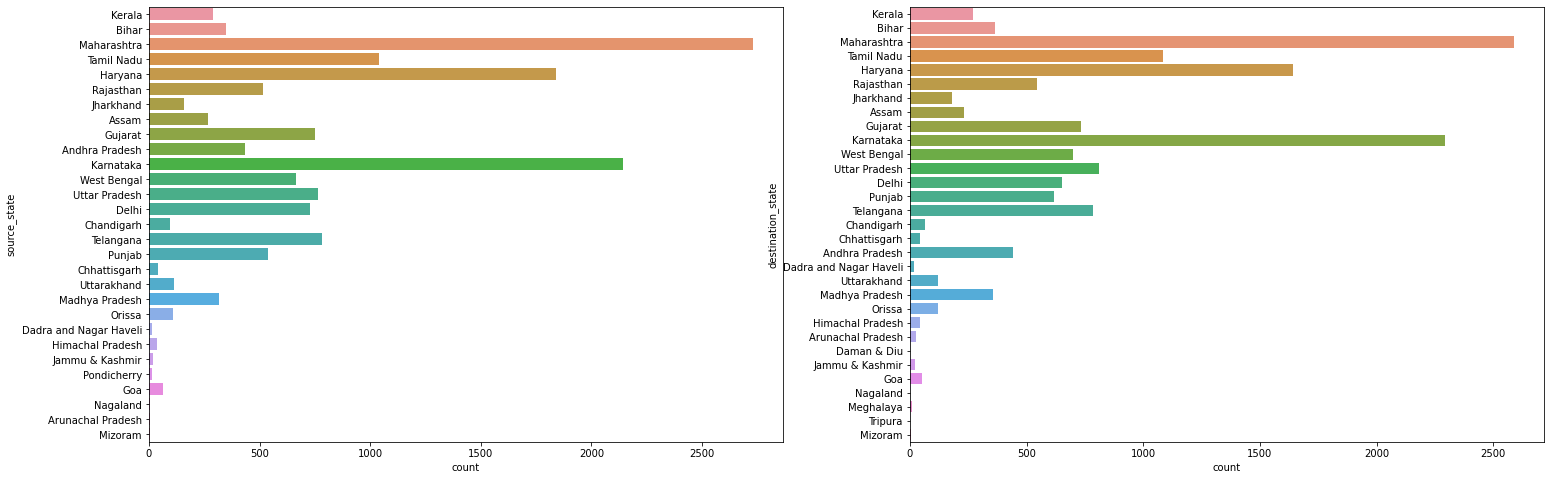

In [879]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(data = df1,
            y = "source_state")

plt.subplot(1,2,2)
sns.countplot(data = df1,
            y = "destination_state")

### <span style="color:green">INSIGHTS:</span>
- Maximum delivery is done in **September**
- Maximum delivery is done on **Saturday and Sunday (Weekend)**
- Least delivery is on Monday

<AxesSubplot:xlabel='day_trip_creation', ylabel='count'>

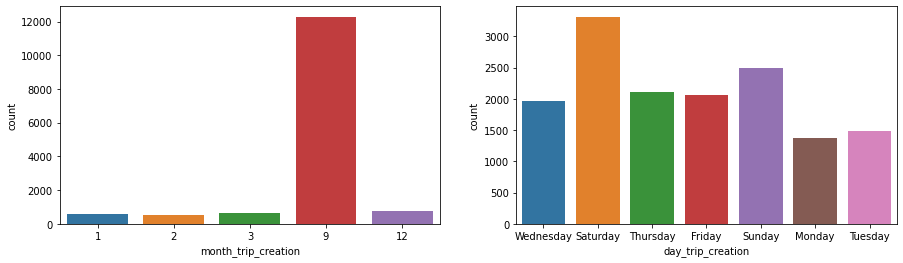

In [880]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = df1,
            x = "month_trip_creation")

plt.subplot(1,2,2)
sns.countplot(data = df1,
            x = "day_trip_creation")

In [881]:
# all the data is from Year 2018
df1["year_trip_creation"].value_counts()

2018    14817
Name: year_trip_creation, dtype: int64

# <span style='background :yellow'>HYPOTHESIS TESTING:</span>

# `1. Testing: Calculated total time = OR != mentioned start scan to end scan time`
###  <span style="color:green">Hypothesis Testing:</span>
- H0: Calculated total time **=** mentioned start scan to end scan time
- H1: Calculated total time **!=** mentioned start scan to end scan time
- Visual analysis: **QQplot**

###  <span style="color:green">RESULTS / INSIGHTS:</span>
- On Viewing the statistical summary for both the columns there is a huge difference in mean, median, quantile
- ttest using sample shows **very low p-value**
- Visual analysis of QQplot and boxplot shows there is a huge difference. Hence we **Reject the Null Hypothesis.**
- **Hence, both the time are not equal**

In [882]:
#creating and checking then statistical distribution between above two columns
a = df1["start_scan_to_end_scan"]
b = df1["od_time_diff"]
df1[["start_scan_to_end_scan","od_time_diff"]].describe()

,start_scan_to_end_scan,od_time_diff
count,14817.000000,14817.000000
mean,530.823716,7415.809543
std,658.737462,41362.291238
min,23.000000,0.000000
25%,149.000000,106.000000
50%,280.000000,208.000000
75%,637.000000,445.000000
max,7898.000000,380092.000000


<AxesSubplot:ylabel='od_time_diff'>

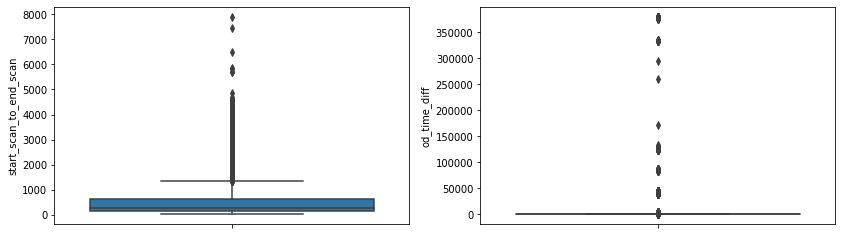

In [883]:
#Boxplot to check the distribution of data and compare the relation between them
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data = df1, y = "start_scan_to_end_scan")

plt.subplot(1, 2, 2)
sns.boxplot(data = df1, y = 'od_time_diff')

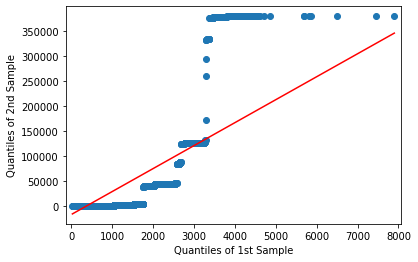

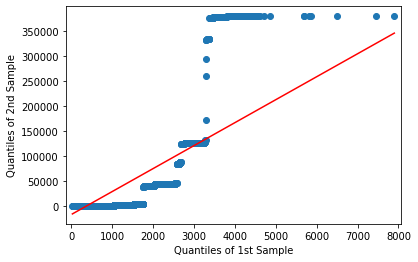

In [884]:
#QQplot to check the distribution of data and compare the variance between them
qqplot_2samples(df1["start_scan_to_end_scan"], df1['od_time_diff'], line = "r")

# `2. Actual_time aggregated value & OSRM time aggregated value                `
###  <span style="color:green">Hypothesis Testing:</span>
- H0: Actual_time aggregated value  **=** OSRM time aggregated value
- H1: Actual_time aggregated value  **!=** OSRM time aggregated value
- Visual analysis: **Emperical CDF**

###  <span style="color:green">RESULTS / INSIGHTS:</span>
- Checking the statistical summary: there is a good difference in the mean, median, and percentile distribution
- On plotting Distplot, the graph is similar but the values differ.
- Both curves from KS test are very far from each other, which show they are **not equal**
- Hence, we **Reject the Null Hypothesis** 

In [885]:
df1[["actual_time", "osrm_time"]].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.153945,161.385908
std,561.406220,271.361145
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

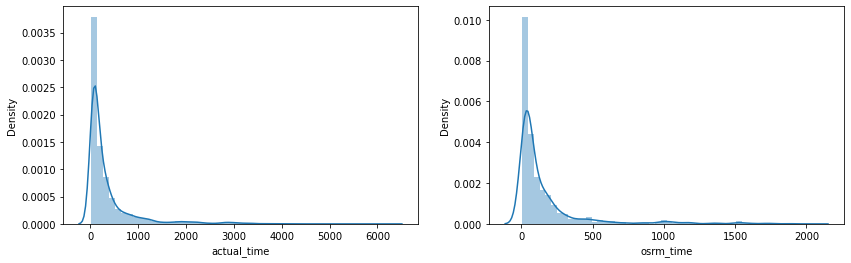

In [886]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(df1["actual_time"])

plt.subplot(1, 2, 2)
sns.distplot(df1["osrm_time"])

In [887]:
# emperical CDF
e1 = ECDF(df1["actual_time"])
e2 = ECDF(df1["osrm_time"])

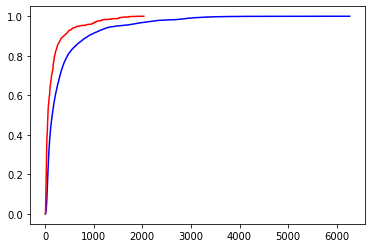

In [888]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [889]:
kruskal(df1["actual_time"], df1["osrm_time"])

KruskalResult(statistic=3406.026556439765, pvalue=0.0)

# `3. Actual_time aggregated value and segment actual time aggregated value`
###  <span style="color:green">Hypothesis Testing:</span>
- H0: Mean of Actual_time aggregated value **=**  Mean segment actual time aggregated value
- H1: Mean Actual_time aggregated value **!=**  Mean segment actual time aggregated value
- Significance level = **0.05**
- Test: **Ttest_ind**
- Visual analysis: **QQplot**

###  <span style="color:green">RESULTS / INSIGHTS:</span>
- Statistical summary says most of the values in mean, median, quantile are **similar**
- Distribution of both the columns is **exactly same**
- QQplot shows all the values in the line, **almost no variance**
- two-tail ttest_ind gives a **p-value 0.552 > 0.05 (significance level).**
- Hence, we **Fail to Reject Null Hypothesis**

In [890]:
df1[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.153945,353.892286
std,561.406220,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


<AxesSubplot:xlabel='segment_actual_time', ylabel='Density'>

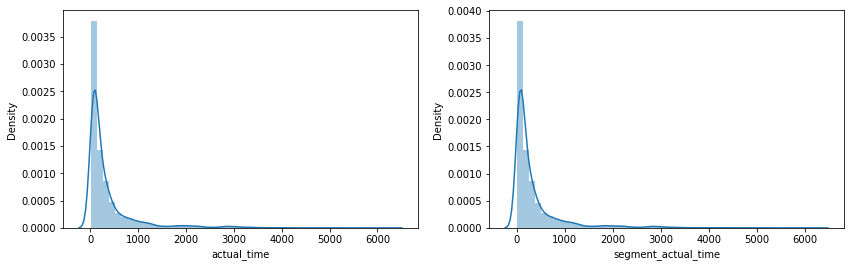

In [891]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(df1["actual_time"])

plt.subplot(1, 2, 2)
sns.distplot(df1['segment_actual_time'])

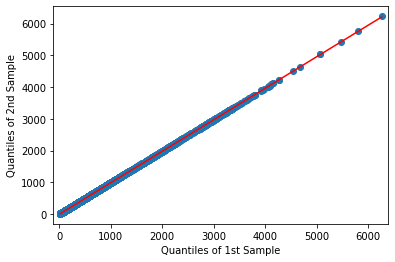

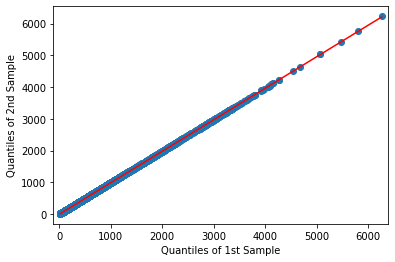

In [892]:
qqplot_2samples(df1["actual_time"],df1["segment_actual_time"], line = "r")

In [893]:
import statistics
actual_time = df1["actual_time"].sample(8000)
segment_actual_time = df1["segment_actual_time"].sample(8000)

print("sample standard deviation of actual_time: ", statistics.stdev(actual_time))
print("sample standard deviation of segment_actual_time: ", statistics.stdev(segment_actual_time))

sample standard deviation of actual_time:  569.8811068624132
sample standard deviation of segment_actual_time:  553.7551634054839


###  Why two-tail TTtest?
- As the sample standard deviations are same, the population standard deviations can be assumed to be same
- As the population standard deviations are unknown, the two sample independent t-test will be theappropriate test for this problem

In [894]:
ttest_ind(actual_time,segment_actual_time)

Ttest_indResult(statistic=0.7017641049835, pvalue=0.4828364961610536)

# `4. OSRM distance aggregated value and Segment OSRM distance aggregated value`
###  <span style="color:green">Hypothesis Testing:</span>
- H0: OSRM distance aggregated value **=** Segment OSRM distance aggregated value
- H1: SRM distance aggregated value **!=** Segment OSRM distance aggregated value
- Significance level = **0.05**
- Test: **Left-tail Ttest_ind**
- Visual analysis: **Emperical CDF**

###  <span style="color:green">RESULTS / INSIGHTS:</span>
- Statistical summary says there is some differnce in both the column
- Box-plot is somewhat similar
- Empirical CDF is also same
- Left Tail Ttest: **p-value 0.034< 0.05**
- Hence, we **Reject Null Hypothesis**

In [895]:
df1[["osrm_distance", "segment_osrm_distance"]].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.347249,223.201161
std,370.395749,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


<AxesSubplot:xlabel='segment_osrm_distance'>

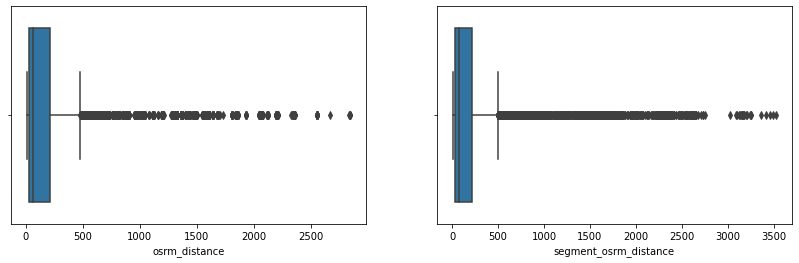

In [896]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df1["osrm_distance"])

plt.subplot(1, 2, 2)
sns.boxplot(df1["segment_osrm_distance"])

In [897]:
# emperical CDF
e1 = ECDF(df1["osrm_distance"])
e2 = ECDF(df1["segment_osrm_distance"])

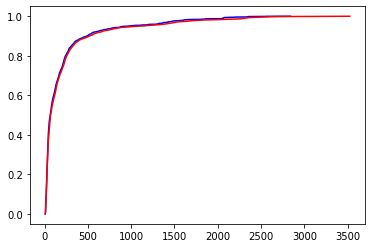

In [898]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [899]:
a = df1["osrm_distance"].sample(5000)
b = df1["segment_osrm_distance"].sample(5000)

print("sample variance of osrm_distance: ", a.var())
print("sample variance of segment_osrm_distance: ", b.var())

sample variance of osrm_distance:  140106.7055108579
sample variance of segment_osrm_distance:  169596.00552474606


### Why left-tail ttest?
- As the sample variance are not same, the population standard deviations canbe assumed to be unequal
- As the population variance is unknown, the left tail sample independent t-test will be the appropriate test for this problem.

In [900]:
ttest_ind(a,b, equal_var=False, alternative ="less")

Ttest_indResult(statistic=-1.8248024333256079, pvalue=0.03403047221164801)

In [901]:
kruskal(a,b)

KruskalResult(statistic=6.912681502723976, pvalue=0.008558654254439668)

# `5. Osrm time aggregated value and Segment Osrm time aggregated value`
### Hypothesis Testing:
- H0: Actual_time aggregated value  **=** OSRM time aggregated value
- H1: Actual_time aggregated value  **!=** OSRM time aggregated value
- Significance level = **0.05**
- Test: **Kruskal Test**
- Visual analysis: **Emperical CDF**

###  <span style="color:green">RESULTS / INSIGHTS:</span>
- Statistical summary shows some difference in mean,median, quantiles
- Distribution plot looks similar, **non-normal distribution, hence we used Kruskal Test**
- Standard deviation of both the samples is significantly different
- **Kruskal Result: p-value 0.004 < 0.05**
- QQ-plot shows variance in the both the data
- Hence, we **Reject Null Hypothesis**

In [902]:
df1[["osrm_time", "segment_osrm_time"]].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.385908,180.949787
std,271.361145,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


<AxesSubplot:xlabel='segment_osrm_time', ylabel='Density'>

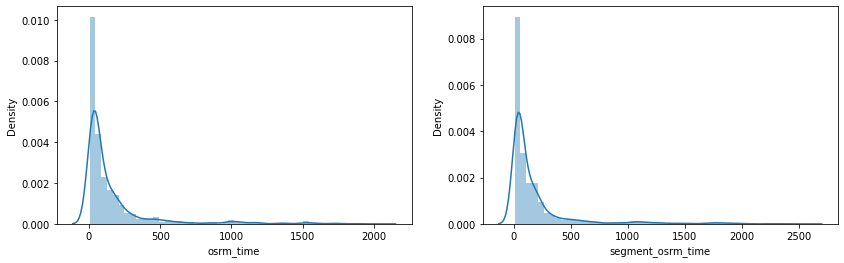

In [903]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(df1["osrm_time"])

plt.subplot(1, 2, 2)
sns.distplot(df1["segment_osrm_time"])

In [904]:
a1 = df1["osrm_time"].sample(5000)
b1 = df1["segment_osrm_time"].sample(5000)

In [905]:
print("sample standard deviation of osrm_time: ", statistics.stdev(a1))
print("sample standard deviation of segment_osrm_time: ", statistics.stdev(b1))

sample standard deviation of osrm_time:  269.94687741162124
sample standard deviation of segment_osrm_time:  313.96581221886


In [906]:
kruskal(a1,b1)

KruskalResult(statistic=20.060906936989923, pvalue=7.501447943913772e-06)

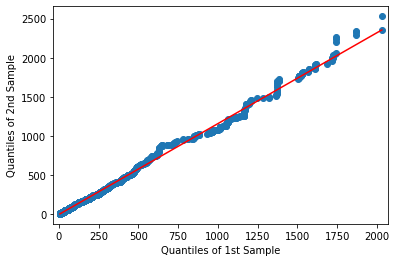

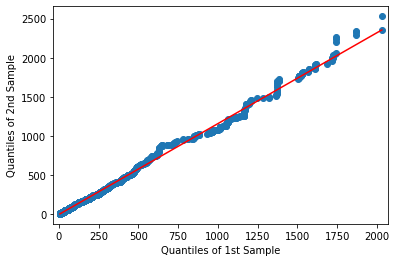

In [907]:
qqplot_2samples(a1,b1,line ="r")

# <span style='background :yellow'> Separated columns as per dtype:</span>

In [908]:
#separating all numerical columns from aggregated data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df1.select_dtypes(include=numerics)
cat_df = df1.select_dtypes(include="object")
date_time_df = df1.select_dtypes(include="datetime64")
print("No. of row and columns in numerical data: ", num_df.shape)
print()
print("No. of row and columns in catrgorical data: ", cat_df.shape)
print()
print("No. of row and columns in date & time data: ", date_time_df.shape)

No. of row and columns in numerical data:  (14817, 11)

No. of row and columns in catrgorical data:  (14817, 15)

No. of row and columns in date & time data:  (14817, 3)


# <span style='background :yellow'>Handling Outliers:</span>

###  <span style="color:green">RESULTS / INSIGHTS:
- Outliers can be seen in each column.
- Even of removing outliers the data remains skewed

In [909]:
#sorted all numerical data in ascending order 
for col in num_df.columns:
    num_df[col]=sorted(num_df[col])

In [910]:
#using quantile method to remove outliers from all numerical columns.
low = 0.2
high = 0.95
num_df1 = num_df.quantile([low,high])
print(num_df1)

      start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0.20                   131.0                       20.845073         58.2   
0.95                  1893.0                      828.492142       1471.4   

      osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0.20       25.0       27.41810                 58.0               26.0   
0.95      709.2      969.31604               1455.2              833.0   

      segment_osrm_distance  month_trip_creation  year_trip_creation  \
0.20               28.46886                  9.0              2018.0   
0.95             1103.75944                 12.0              2018.0   

      od_time_diff  
0.20          88.2  
0.95       39510.4  


In [911]:
#applying lambda function to remove the outliers as per defined quantiles
num_df = num_df.apply(lambda x: x[(x > num_df1.loc[low,x.name]) & 
                                  (x < num_df1.loc[high,x.name])], axis = 0)

In [912]:
#statistical summary after removing outliers
num_df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,month_trip_creation,year_trip_creation,od_time_diff
count,11078.000000,11112.000000,11112.000000,11077.000000,11112.000000,11054.000000,11086.000000,11112.000000,0.0,0.0,11112.000000
mean,498.448817,126.580387,306.076674,132.190304,160.034114,304.722544,145.787209,171.738784,NaN,NaN,704.015839
std,384.822064,137.644320,290.499983,129.069300,169.831844,288.722058,144.397493,183.240176,NaN,NaN,3196.759226
min,132.000000,20.845697,59.000000,26.000000,27.424500,59.000000,27.000000,28.473500,NaN,NaN,89.000000
25%,210.000000,33.897317,100.000000,41.000000,42.750225,100.000000,47.000000,47.828625,NaN,NaN,158.000000
50%,344.000000,71.289051,195.000000,82.000000,91.003300,194.000000,88.000000,102.829800,NaN,NaN,251.000000
75%,676.750000,172.255585,389.000000,174.000000,215.304850,387.000000,190.000000,227.240175,NaN,NaN,471.000000
max,1890.000000,828.324400,1471.000000,709.000000,969.257800,1454.000000,831.000000,1103.331000,NaN,NaN,39509.000000


In [913]:
#shape of new data after removing outliers
num_df.shape

(11112, 11)

# <span style='background :yellow' >One-hot encoding of categorical variables

###  <span style="color:green">RESULTS / INSIGHTS:
- **Encoded the categorical values to numerical**
- **79% of the delivery are made in the same state**
- **Route type (FTL/Carting)** has good relation with distance and time for ddelivery.

In [914]:
encoding = df1.copy(deep = True)

In [915]:
cat_df.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'destination_center', 'day_trip_creation',
       'source_state', 'source_city', 'source_place', 'source_city_code',
       'destination_state', 'destination_city', 'destination_place',
       'destination_city_code'],
      dtype='object')

In [916]:
encoding['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [917]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col = 'route_type'
encoding[col] = label_encoder.fit_transform(encoding[col])
encoding['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

In [918]:
encoding["day_trip_creation"].value_counts()

Saturday     3313
Sunday       2502
Thursday     2106
Friday       2060
Wednesday    1966
Tuesday      1488
Monday       1382
Name: day_trip_creation, dtype: int64

In [919]:
label_encoder = LabelEncoder()
col = 'day_trip_creation'
encoding[col] = label_encoder.fit_transform(encoding[col])
encoding['day_trip_creation'].value_counts()

2    3313
3    2502
4    2106
0    2060
6    1966
5    1488
1    1382
Name: day_trip_creation, dtype: int64

In [920]:
encoding["source_state"].value_counts()

Maharashtra               2730
Karnataka                 2143
Haryana                   1838
Tamil Nadu                1039
Telangana                  781
Uttar Pradesh              762
Gujarat                    750
Delhi                      728
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             434
Bihar                      350
Madhya Pradesh             317
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: source_state, dtype: int64

In [921]:
label_encoder = LabelEncoder()
col = 'source_state'
encoding[col] = label_encoder.fit_transform(encoding[col])
encoding["source_state"].value_counts()

17    2730
14    2143
10    1838
24    1039
25     781
26     762
9      750
7      728
28     665
22     536
23     514
0      434
3      350
16     317
15     289
2      268
13     160
27     114
20     107
4       93
8       65
5       43
11      34
12      17
6       15
21      12
19       5
1        4
18       4
Name: source_state, dtype: int64

In [922]:
encoding["destination_state"].value_counts()

Maharashtra               2588
Karnataka                 2294
Haryana                   1643
Tamil Nadu                1084
Uttar Pradesh              811
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      652
Punjab                     617
Rajasthan                  543
Andhra Pradesh             442
Bihar                      365
Madhya Pradesh             358
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
Meghalaya                    8
Mizoram                      6
Daman & Diu                  1
Nagaland                     1
Tripura                      1
Name: destination_state, dtype: int64

In [923]:
label_encoder = LabelEncoder()
col = 'destination_state'
encoding[col] = label_encoder.fit_transform(encoding[col])
encoding["destination_state"].value_counts()

18    2588
15    2294
11    1643
25    1084
28     811
26     784
10     734
30     697
8      652
23     617
24     543
0      442
3      365
17     358
16     270
2      232
14     181
29     122
22     119
4       65
9       52
5       43
12      42
1       25
13      20
6       17
19       8
20       6
7        1
21       1
27       1
Name: destination_state, dtype: int64

In [924]:
encoding.drop("year_trip_creation",axis = 1, inplace = True)

<AxesSubplot:>

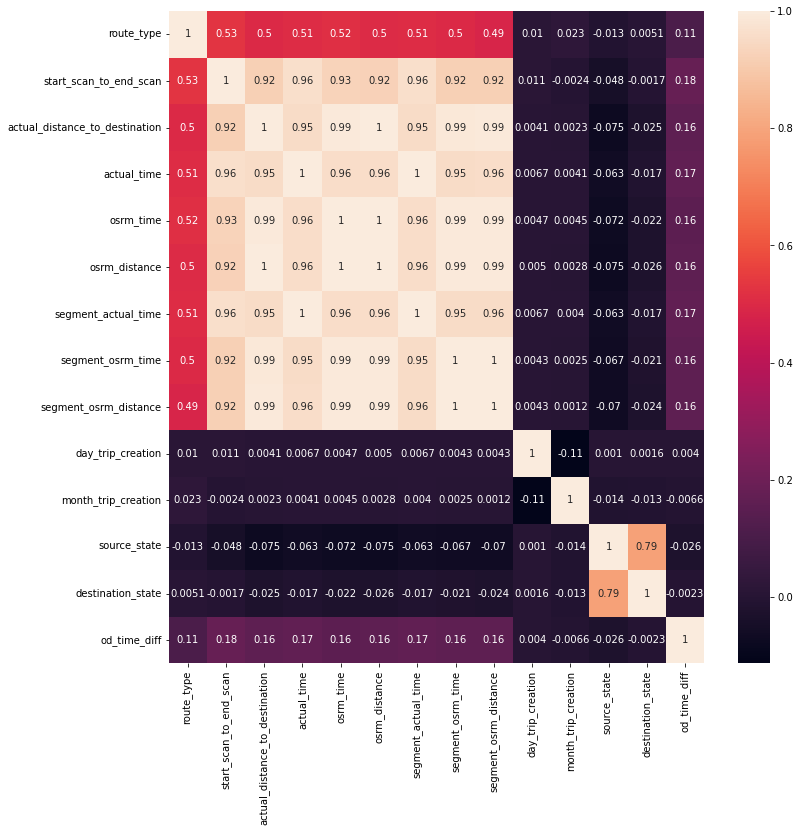

In [925]:
#Heatmaop to check the correlation between numerical columns
plt.figure(figsize=(12, 12))
sns.heatmap(encoding.corr(), annot = True)

# <span style='background :yellow' > Corridor Analysis:

###  <span style="color:green">RESULTS / INSIGHTS:
- Busiest Corridor for city - **Bangalore to Bangalore**
- Busiest State Corridor - **Maharashtra > Karnataka**
- Highest time taken among the busiest cities is in Bangalore **75-85mins** per delivery

In [926]:
#combining source and destionation state, to get the state corridor
state_corridor =  df1["source_state"] +"-"+ df1["destination_state"]
print(state_corridor.value_counts())

Maharashtra-Maharashtra       2454
Karnataka-Karnataka           2056
Tamil Nadu-Tamil Nadu         1021
Haryana-Haryana                949
Telangana-Telangana            685
                              ... 
Orissa-Andhra Pradesh            1
Assam-Nagaland                   1
Madhya Pradesh-Maharashtra       1
Haryana-Andhra Pradesh           1
Karnataka-Goa                    1
Length: 145, dtype: int64


In [927]:
#combining source and destionation city, to get the city corridor
city_corridor = df1["source_city"] +"-"+ df1["destination_city"]
print(city_corridor.value_counts())

Bengaluru-Bengaluru    581
Bangalore-Bengaluru    455
Hyderabad-Hyderabad    355
Mumbai-Mumbai          339
Bhiwandi-Mumbai        332
                      ... 
GGN-Delhi                1
Delhi-Lucknow            1
Faizabad-Gosainganj      1
Gurgaon-Vijayawada       1
Gwalior-Ambah            1
Length: 1765, dtype: int64


In [928]:
#add feature of city corridor in the data
df1["city_corridor"] = city_corridor

In [929]:
#included the route type to get better insights in average of corridor
corridor = df1[["route_type",'segment_actual_time','actual_distance_to_destination',"city_corridor"]]
corridor.head()

,route_type,segment_actual_time,actual_distance_to_destination,city_corridor
0,Carting,24.0,9.794329,Parakkdavu-Mundakayam
1,FTL,658.0,143.657489,Raxaul-Raxaul
2,FTL,638.0,205.350873,Muzaffrpur-Muzaffrpur
3,Carting,38.0,13.512135,Pune-PNQ Rahatani DPC
4,Carting,233.0,170.129587,Manamelkudi-Thiruvadanai


In [930]:
# average for each corridors
avg_corridor = corridor.groupby(["city_corridor", "route_type"], as_index=False).agg({"segment_actual_time":"mean","actual_distance_to_destination":"mean"})
avg_corridor.describe()

,segment_actual_time,actual_distance_to_destination
count,1809.000000,1809.000000
mean,372.558251,159.630288
std,451.156795,226.363509
min,11.500000,9.027513
25%,118.666667,48.186140
50%,242.000000,97.417902
75%,442.000000,178.521970
max,5032.000000,2061.156970


In [931]:
#speed: km/min to check the average speed taken to delivery from A-B
avg_corridor["delivery_speed"] = (avg_corridor["actual_distance_to_destination"]/avg_corridor["segment_actual_time"])

In [932]:
avg_corridor[(avg_corridor["city_corridor"]=="Bengaluru-Bengaluru")]

,city_corridor,route_type,segment_actual_time,actual_distance_to_destination,delivery_speed
225,Bengaluru-Bengaluru,Carting,84.285455,31.037137,0.368238
226,Bengaluru-Bengaluru,FTL,623.000000,317.192086,0.509137


In [933]:
avg_corridor[(avg_corridor["city_corridor"]=="Bangalore-Bengaluru")]

,city_corridor,route_type,segment_actual_time,actual_distance_to_destination,delivery_speed
165,Bangalore-Bengaluru,Carting,76.353468,26.830229,0.351395
166,Bangalore-Bengaluru,FTL,91.250000,39.673646,0.434780


In [934]:
avg_corridor[(avg_corridor["city_corridor"]=="Hyderabad-Hyderabad")]

,city_corridor,route_type,segment_actual_time,actual_distance_to_destination,delivery_speed
803,Hyderabad-Hyderabad,Carting,105.747664,25.727989,0.243296
804,Hyderabad-Hyderabad,FTL,580.911765,342.766466,0.590049


In [935]:
avg_corridor[(avg_corridor["city_corridor"]=="Mumbai-Mumbai")]

,city_corridor,route_type,segment_actual_time,actual_distance_to_destination,delivery_speed
1236,Mumbai-Mumbai,Carting,93.138643,21.750017,0.233523


In [936]:
avg_corridor[(avg_corridor["city_corridor"]=="Bhiwandi-Mumbai")]

,city_corridor,route_type,segment_actual_time,actual_distance_to_destination,delivery_speed
291,Bhiwandi-Mumbai,Carting,77.786145,23.004948,0.295746


In [937]:
avg_corridor.describe()

,segment_actual_time,actual_distance_to_destination,delivery_speed
count,1809.000000,1809.000000,1809.000000
mean,372.558251,159.630288,0.439313
std,451.156795,226.363509,0.156361
min,11.500000,9.027513,0.014118
25%,118.666667,48.186140,0.337852
50%,242.000000,97.417902,0.444705
75%,442.000000,178.521970,0.548132
max,5032.000000,2061.156970,0.954197


<AxesSubplot:xlabel='delivery_speed', ylabel='Count'>

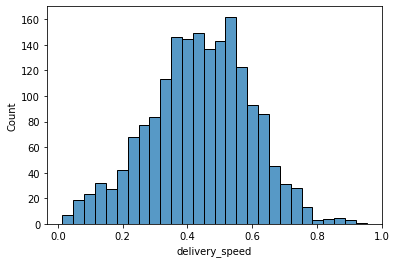

In [938]:
# distribution of average time taken for delivery
sns.histplot(avg_corridor["delivery_speed"])

# <span style='background :yellow' > Column Standarization and Normalizationm

In [939]:
encoded_num = encoding.select_dtypes(include=numerics)

In [940]:
#standardizing the numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_num)
std_data = pd.DataFrame(std_data, columns=encoded_num.columns)
std_data.head()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,day_trip_creation,month_trip_creation,source_state,destination_state,od_time_diff
0,-0.814455,-0.743605,-0.506539,-0.593448,-0.561580,-0.516924,-0.593087,-0.546686,-0.504817,1.631436,-2.996847,-0.105492,-0.138864,-0.178280
1,1.227815,1.087232,-0.068187,0.541241,-0.111980,-0.056136,0.546731,-0.041172,0.035140,1.631436,-2.996847,-1.753879,-1.843441,-0.179295
2,1.227815,1.509266,0.133836,0.505615,0.112821,0.067161,0.510775,0.028774,0.014790,1.631436,-2.996847,-1.753879,-1.843441,0.902064
3,-0.814455,-0.717797,-0.494364,-0.568509,-0.539469,-0.503872,-0.567917,-0.530789,-0.493213,1.631436,-2.996847,0.169239,0.123378,-0.177893
4,-0.814455,-0.154579,0.018499,-0.203343,-0.008793,-0.005234,-0.217343,-0.098400,-0.049909,1.631436,-2.996847,1.130797,1.041227,-0.176128


# <span style='background :yellow' > Recommendataions:

###  <span style="color:green"> Period:
- **September** is the busiest month as per the data. During this month, the company shall bring in more vehicles as per the busiest corridor.
- **Weekend** has the highest deliveries to be made, contractual employees and transport will be cost saving.

###  <span style="color:green"> Logistics:
- **Average speed from source-destination is 44mins**, and highest can be seen in Bangalore city. As it's known that Bangalore traffic is always busyThis can be reduced to 25mins by increasing efficiency osrm and increasing transport to carter the Bangalore market.
-  **FTL is taking more time compared to Carting**, if this can be converted to carting then it will make a huge difference in faster delivery. Also, FTL takes longer to reach due the transport vehicle size on road.
- **Improvement in OSRM time** can bring in efficiency and productivity
- **Average distance is 160kms**, this can be reduced by breaking the logistics chain in smaller route
- **Optimize delivery routes by hiring local delivery person, who is efficient in locating shorter routes**
- **Efficient Routing Map** for drivers can help them locate and avoid traffic in the cities.

###  <span style="color:green"> Corridor / Location:
- **Busiest corridor is Bangalore > Hyderabad > Mumbai**. These corridors shall focused more by bringing in automation in delivery time prediction and efficient transport service.
- Supply chain in city like Bangalore can be breaked in **smaller distances** to bringing in efficiency. 
- **Scheduling drivers in advance**, for citied like Bangalore, Hyderabad, Mumbai.
- **Priortize the delivery, by adjusting routes and keep changing it as per the priority.**
- **Tamil Nadu and Haryana seems next potential states and can be targeted further by bringing in faster delivery and promotional ads.**
